# Исследование объявлений о продаже квартир

На основе данных сервиса Яндекс.Недвижимость нужно научиться определять рыночную стоимость объектов недвижимости.

**Цель исследования** - установить параметры, которые позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

**Ход исследования**

Данные об объектах недвижимости получаем из файла `/datasets/real_estate_data.csv`.

Исследование пройдет в 3 этапа:
* Обзор данных
* Предобработка данных
* Исследовательский анализ данных
* Оформление вывода и результатов работы

## Шаг 1. Обзор данных

Для работы с данными используем библиотеку `pandas`. Импортируем ее прочитаем данные из файла `/datasets/real_estate_data.csv`. В качестве разделителя используем `\t`
Для визуализации результатов и построения графиков используем библиотеку `matplotlib`

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [21]:
try:
    real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except FileNotFoundError:
    real_estate_data = pd.read_csv('../../datasets/real_estate_data.csv', sep='\t')

Для обзора таблицы с данными выведем на экран первые 10 строк

In [22]:
real_estate_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о таблице

In [23]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца, встречаются различные типы данных.

Согласно документации:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Воспользуемся методом `describe()`, чтобы посмотреть распределение данных по столбцам

In [24]:
real_estate_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Из вывода метода `info()` видно, что в таблице имеются пропуски.
Из вывода метода `describe()` видно, что таблице присутствуют аномалии, например - максимальное и минимальное значения высоты потолков 1 и 100 метров соответственно, большое стандартное отклонение в столбце `total_area` и т.д.

**Выводы**

В каждой строке таблицы мы видим информацию об объекте недвижимости.

При обзоре таблицы с данными замечаем следующие проблемы:
* Имеются пропуски в данных
* Большие стандартные отклонения в столбцах
* Выбросы
* Неправильные типы данных

Чтобы двигаться дальше, необходимо устранить проблемы в данных.

## Шаг 2. Предобработка данных

### Шаг 2.1. Определение и изучение пропущенных значений

В столбце `is_apartment` заменим пропущенные значения на False, т.к. логично предположить, что если не указано, что это апартаменты, значит это не апартаменты

In [25]:
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].fillna(False)

В столбце `balcony` заменим пропущенные значения на 0, т.к. логично предположить, что если число балконов не указано, значит их нет

In [26]:
real_estate_data['balcony'] = real_estate_data['balcony'].fillna(0)

В столбце `locality_name` заменим пропуски на 'unknown'

In [27]:
real_estate_data['locality_name'] = real_estate_data['locality_name'].fillna('unknown')

В столбце `floors_total` имеется небольшое количество пропусков, удалим их

In [28]:
real_estate_data = real_estate_data.loc[~real_estate_data['floors_total'].isna()]

В столбце `rooms` есть нулевые значения

In [29]:
real_estate_data.pivot_table(index='rooms', values='total_images', aggfunc='count')

,total_images
rooms,
0,194
1,8015
2,7913
3,5795
4,1177
5,325
6,104
7,59
8,12


Проверим, являются ли квартиры с 0 комнат студиями

In [30]:
real_estate_data.query('rooms == 0 and studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,False,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,NaN,25.0,18.20,5,False,True,False,NaN,0.0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,False,True,False,NaN,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,False,True,False,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


135 квартир из 197 являются студиями. Заменим количество комнат в этих случаях на 1

In [31]:
real_estate_data.loc[(real_estate_data['rooms'] == 0) & (real_estate_data['studio'] == True), 'rooms'] = 1

In [32]:
real_estate_data = real_estate_data[real_estate_data['rooms'] != 0]

В остальных столбцах оставим пропуски, т.к. для них нет логичной замены

### Шаг 2.2. Приведение данных к нужным типам

Столбец `last_price` можно привести к целому типу для простоты вычислений, т.к. сумма всех значений этого столбца не имеет дробной части

In [33]:
real_estate_data['last_price'].sum()

154211385098.0

Значения столбцов `floors_total` и `balcony` по логике не могут быть дробными, поэтому их тоже приводим к целому типу. Так же приведем к целому все столбцы, имеющие булев тип данных

In [34]:

real_estate_data = real_estate_data.astype({'last_price': 'int64',
                                            'floors_total': 'int64',
                                            'balcony': 'int64',
                                            'is_apartment': 'int64',
                                            'studio': 'int64',
                                            'open_plan': 'int64'
                                            })

Проверим таблицу

In [35]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23554 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23554 non-null  int64  
 1   last_price            23554 non-null  int64  
 2   total_area            23554 non-null  float64
 3   first_day_exposition  23554 non-null  object 
 4   rooms                 23554 non-null  int64  
 5   ceiling_height        14485 non-null  float64
 6   floors_total          23554 non-null  int64  
 7   living_area           21688 non-null  float64
 8   floor                 23554 non-null  int64  
 9   is_apartment          23554 non-null  int64  
 10  studio                23554 non-null  int64  
 11  open_plan             23554 non-null  int64  
 12  kitchen_area          21382 non-null  float64
 13  balcony               23554 non-null  int64  
 14  locality_name         23554 non-null  object 
 15  airports_nearest   

Значения нужных типов, нужные пропуски заполнены, можно двигаться дальше

## Шаг 3. Дополним таблицу новыми значениями

Добавим в таблицу цену квадратного метра и сразу приведем значение к целому типу

In [36]:
real_estate_data['square_meter_price'] = (real_estate_data['last_price'] / real_estate_data['total_area']).astype('int64')

Добавим в таблицу день недели, месяц и год публикации объявления

In [37]:
real_estate_data['publication_day'] = pd.to_datetime(real_estate_data['first_day_exposition']).dt.weekday
real_estate_data['publication_month'] = pd.to_datetime(real_estate_data['first_day_exposition']).dt.month
real_estate_data['publication_year'] = pd.to_datetime(real_estate_data['first_day_exposition']).dt.year

Разделим квартиры по этажу на категории. Для этого определим функцию:

In [38]:
def floor_categorizer(raw):
    if raw['floor'] == 1:
        return 'первый'
    elif raw['floor'] == raw['floors_total']:
        return 'последний'
    return 'другой'

и применим ее к датасету, создав новый столбец

In [39]:
real_estate_data['floor_category'] = real_estate_data.apply(floor_categorizer, axis=1)

Добавим в таблицу соотношение жилой и общей площади

In [40]:
real_estate_data['living/total'] = real_estate_data['living_area'] / real_estate_data['total_area']

И отношение площади кухни к общей площади

In [41]:
real_estate_data['kitchen/total'] = real_estate_data['kitchen_area'] / real_estate_data['total_area']

## Шаг 4. Проведем исследовательский анализ данных и выполним инструкции

### Шаг 4.1. Изучим параметры

**Задание**
Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Построим гистограмму по столбцу `total_area`

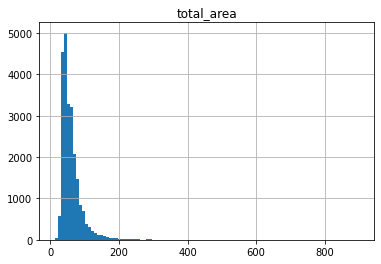

In [42]:
real_estate_data.hist('total_area', bins=100);

На гистограмме видим большой хвост справа. Построим диграмму размаха, чтобы убедиться, что это выбросы

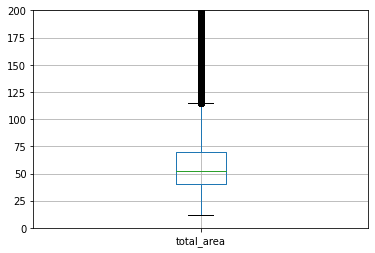

In [43]:
plt.ylim(0, 200)
real_estate_data.boxplot(column='total_area');

Видим выбросы от 0 до 15 и больше 110 кв. м.

Построим гистограмму по столбцу `last_price`

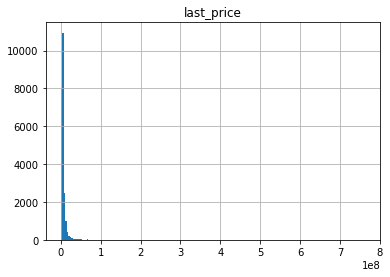

In [44]:
real_estate_data.hist('last_price', bins=200);

Видим такую же проблему, как и в первом случае. Построим диаграмму размаха

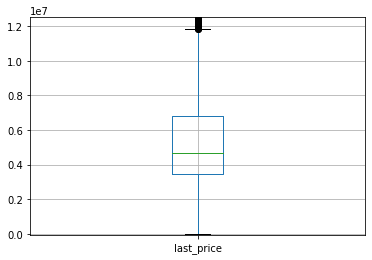

In [45]:
plt.ylim(-50000, 12500000)
real_estate_data.boxplot(column='last_price');

Построим гистограмму по столбцу `rooms`

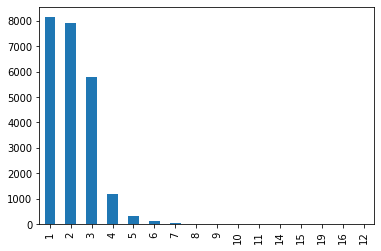

In [46]:
real_estate_data['rooms'].value_counts().plot(kind='bar');

Определим выбросы

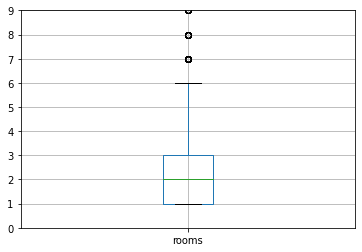

In [47]:
plt.ylim(0, 9)
real_estate_data.boxplot(column='rooms');

Построим гистограмму по столбцу `ceiling_height`

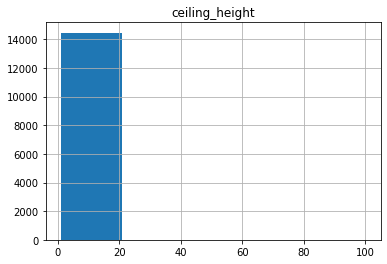

In [48]:
real_estate_data.hist('ceiling_height', bins=5);

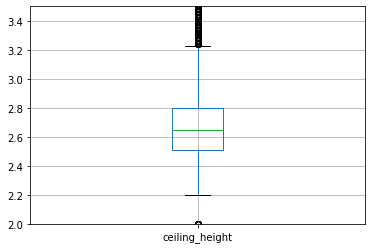

In [49]:
plt.ylim(2, 3.5)
real_estate_data.boxplot(column='ceiling_height');

Напишем функцию, которая на вход будет принимать столбец датафрейма и возвращать кортеж с верхней и нижней границами диаграммы размаха

In [50]:
def filter_outliers(column):
    q1 = column.quantile(q=0.25)
    q3 = column.quantile(q=0.75)
    iqr = q3 - q1
    bottom_line = q1 - 1.5 * iqr
    if bottom_line < 0:
        bottom_line = 0
    top_line = q3 + 1.5 * iqr
    return (bottom_line, top_line)

Найдем граничные значения в столбцах `total_area`, `last_price`, `rooms`, `ceiling_height`

In [51]:
rooms = filter_outliers(real_estate_data['rooms'])
total_area = filter_outliers(real_estate_data['total_area'])
last_price = filter_outliers(real_estate_data['last_price'])
ceiling_height = filter_outliers(real_estate_data['ceiling_height'])

Отфильтруем данные датасета по граничным значениям

In [52]:
data_filtered = real_estate_data.query('(total_area >= @total_area[0] and total_area <= @total_area[1])'
                                       'and (last_price >= @last_price[0] and last_price <= @last_price[1])'
                                       'and (rooms>= @rooms[0] and rooms <= @rooms[1])'
                                       'and ((ceiling_height >= @ceiling_height[0] and ceiling_height <= @ceiling_height[1]) or ceiling_height.isna())')
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20911 entries, 0 to 20910
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20911 non-null  int64  
 1   last_price            20911 non-null  int64  
 2   total_area            20911 non-null  float64
 3   first_day_exposition  20911 non-null  object 
 4   rooms                 20911 non-null  int64  
 5   ceiling_height        12536 non-null  float64
 6   floors_total          20911 non-null  int64  
 7   living_area           19296 non-null  float64
 8   floor                 20911 non-null  int64  
 9   is_apartment          20911 non-null  int64  
 10  studio                20911 non-null  int64  
 11  open_plan             20911 non-null  int64  
 12  kitchen_area          18989 non-null  float64
 13  balcony               20911 non-null  int64  
 14  locality_name         20911 non-null  object 
 15  airports_nearest   

И построим финальные гистограммы

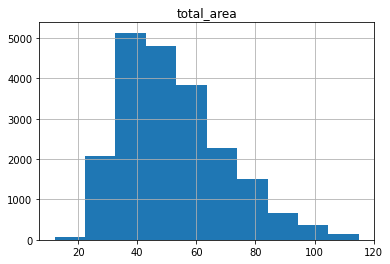

In [53]:
data_filtered.hist('total_area');

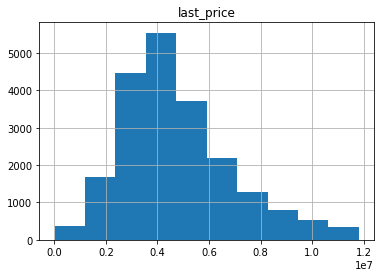

In [54]:
data_filtered.hist('last_price');

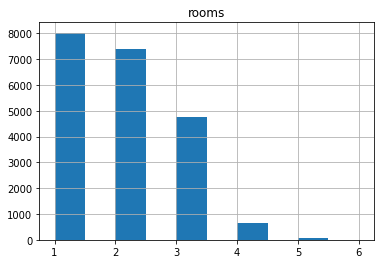

In [55]:
data_filtered.hist('rooms');

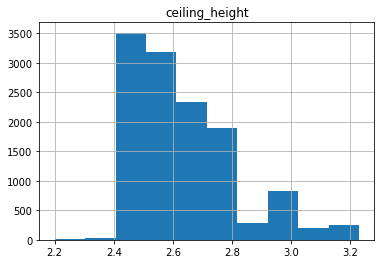

In [56]:
data_filtered.hist('ceiling_height');

Мы получили выборку, по которой видно наиболее часто встречающиеся значения общей площади, цены, количества комнат и высоты потолков.

### Шаг 4.2. Изучим время продажи квартиры

**Задание**
Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Построим гистограмму

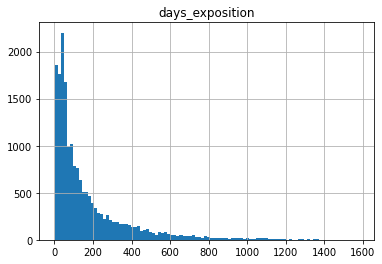

In [57]:
data_filtered.hist('days_exposition', bins=100);

Чаще всего время продажи квартиры составляет меньше 100 дней

Найдем среднее и медиану времени продажи квартиры

In [58]:
data_filtered['days_exposition'].agg(['mean', 'median'])

mean      171.607527
median     91.000000
Name: days_exposition, dtype: float64

В среднем продажа занимает 168 дней, но 50% квартир продаются менее 90 дней

Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
Чтобы ответить на этот вопрос еще раз взглянем на гистограмму, но уменьшим ее диапазон значений:

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

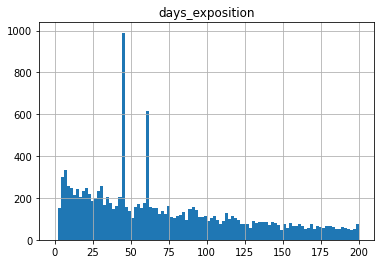

In [59]:
data_filtered.hist('days_exposition', bins=100, range=(0,200))

Самый большой пик количества дней продажи находится в районе 40, следовательно, будем считать, что продажа прошла очень быстро, если время продажи меньше 40 дней, так же видим пик в районе 60 дней - это скорее всего автоматическое снятие объявления по истечению срока публикации

Из первой гистограммы видно, что длительность продажи в 800 дней уже редка, а больше 1000 дней почти нулевая. Будем считать, что продажа была необычно долгой при 1000 и более днях продажи.

### Шаг 4.3. Уберем редкие и выбивающиеся значения

**Задание**
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Отфильтруем данные с временем продажи больше 1000 дней

In [60]:
data_filtered = data_filtered.query('days_exposition <= 1000')

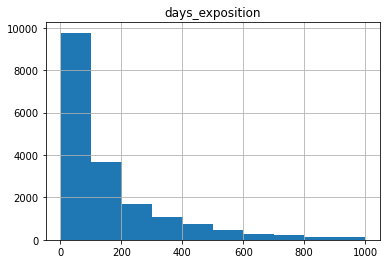

In [61]:
data_filtered.hist('days_exposition');

Посмотрим на распределение средних цен и количества объявлений по годам

In [62]:
data_filtered.pivot_table(index='publication_year', values=['days_exposition', 'last_price'], aggfunc={'days_exposition':'mean', 'last_price':['mean', 'count']})

days_exposition last_price              
                            mean      count          mean
publication_year                                         
2014                  721.560000         50  5.727873e+06
2015                  528.890026        782  4.944084e+06
2016                  305.911064       2350  4.688167e+06
2017                  154.059090       7057  4.682760e+06
2018                   91.317822       6941  4.637119e+06
2019                   30.731805       1003  4.936726e+06

Видим, что с увеличением года снижается среднее время продажи и цена, а объявлений становится все больше

### Шаг 4.4. Найдем факторы, больше всего влияющие на стоимость квартиры

**Задание**
Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Проверим зависимость цены от площади. Для этого построим диаграмму рассеяния и посчитаем коэффициент корреляции

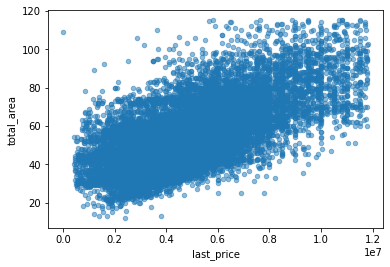

In [63]:
data_filtered.sort_values('total_area').plot(x='last_price', y='total_area', kind='scatter', alpha=0.5);

In [64]:
data_filtered['total_area'].corr(data_filtered['last_price'])

0.6961290350833744

Видим, что в среднем, с увеличением площади увеличивается и цена

Посмотрим зависимость цены от количества комнат. Для этого сгруппируем данные по количеству комнат и найдем среднюю цену. Построим график

<AxesSubplot:xlabel='rooms'>

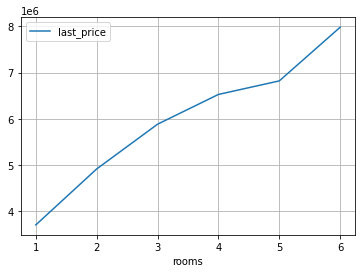

In [65]:
data_filtered.pivot_table(index='rooms', values='last_price').plot(grid=True)

В районе 5 комнат есть провал, это связано с малым количеством квартир с 5 и 6 комнатами, в результате чего искажается среднее значение

In [66]:
data_filtered['rooms'].value_counts()

1    7205
2    6447
3    3965
4     527
5      37
6       2
Name: rooms, dtype: int64

Из графика видно, что цена зависит от количества комнат, что логично, так как с увеличением количества комнат увеличивается и площадь, а следовательно и цена

Посмотрим зависимость цены от расстояния до центра

Построим диаграмму рассеяния

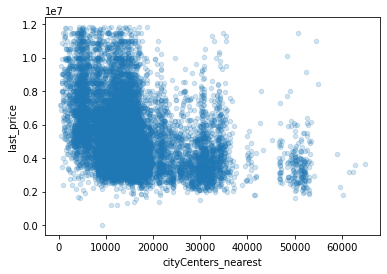

In [67]:
data_filtered.sort_values('last_price').plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.2);

In [68]:
data_filtered['last_price'].corr(data_filtered['cityCenters_nearest'])

-0.3324568916649945

Чем меньше расстояние до центра, тем больше разброс значений цены. Есть тенденция к уменьшению цены при отдалении от центра

Исследуем зависимость цены от этажа, на котором находится квартира

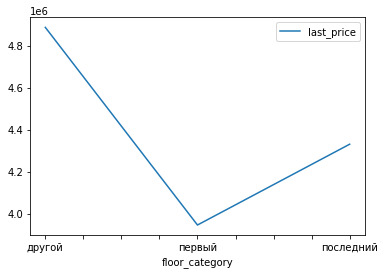

In [69]:
data_filtered.pivot_table(index='floor_category', values='last_price').plot();

Квартиры на первом этаже дешевле

Построим графики зависимости цены от дня, месяца и года продажи

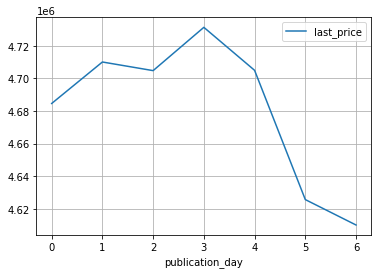

In [70]:
data_filtered.pivot_table(index='publication_day', values='last_price').plot(grid=True);

К выходным цена снижается, а с понедельника по пятницу заметен рост с пиком в пятницу

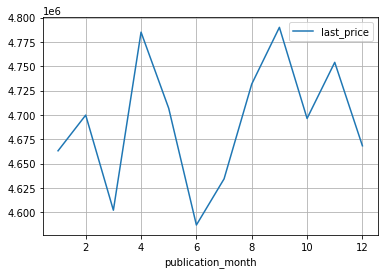

In [71]:
data_filtered.pivot_table(index='publication_month', values='last_price').plot(grid=True);

Видим большой провал в начале лета, связанный с сезоном отпусков и 2 пика весной и осенью

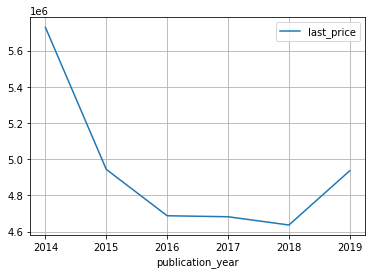

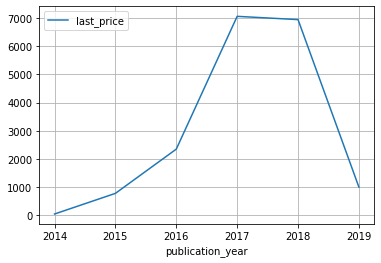

In [72]:
data_filtered.pivot_table(index='publication_year', values='last_price').plot(grid=True)
data_filtered.pivot_table(index='publication_year', values='last_price', aggfunc='count').plot(grid=True);

Большой спад цены с 2014 по 2016 годы связан с увеличением числа объявлений в этот период

Таким образом, лучшее время для для размещения объявления - в середине недели весной или осенью

### Шаг 4.5. Рейтинг населенных пунктов

**Задание**
Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`.

In [73]:
locality = (data_filtered.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
            .sort_values(by=('count', 'square_meter_price'), ascending=False))[:10]
locality.columns = ['count', 'mean_price']
locality

,count,mean_price
locality_name,,
Санкт-Петербург,11557,104269.217184
посёлок Мурино,502,85703.810757
посёлок Шушары,399,77794.395990
Всеволожск,329,66822.796353
Колпино,301,74582.890365
посёлок Парголово,297,89601.673401
деревня Кудрово,281,92186.298932
Пушкин,275,99615.258182
Гатчина,263,68085.125475


Санкт-Петербург на первом месте и по количеству объявлений и по цене квадратного метра

In [74]:
locality.query('mean_price == mean_price.max()')

,count,mean_price
locality_name,,
Санкт-Петербург,11557,104269.217184


In [75]:
locality.query('mean_price == mean_price.min()')

,count,mean_price
locality_name,,
Выборг,195,57293.082051


Самая низкая цена за квадратный метр в Выборге

### Шаг 4.6. Анализ зависимости цены от расстояния до центра в Санкт-Петербурге

**Задание**
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

Отфильтруем всю недвижимость, находящуюся в Санкт-Петербурге

In [76]:
spb = data_filtered.query('locality_name == "Санкт-Петербург"')

Посмотрим пропуски в столбце `cityCenters_nearest`

In [77]:
spb['cityCenters_nearest'].isna().sum()

16

Удалим их

In [78]:
spb = spb[~spb['cityCenters_nearest'].isna()].reset_index(drop=True)

Добавим новый столбец с целым количеством километров до центра

In [79]:
spb['to_center_km'] = (spb['cityCenters_nearest'] / 1000).round().astype('int64')

Теперь посчитаем среднюю цену для каждого километра

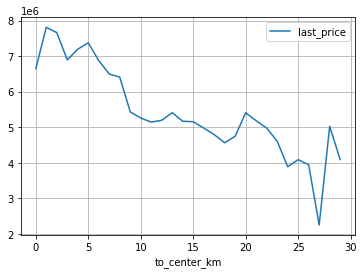

In [80]:
spb.pivot_table(index='to_center_km', values='last_price').plot(grid=True);

Устойчивое снижение стоимости наблюдается на расстоянии примерно 8-9 км от центра, следовательно, примем эту зону за центр

### Шаг 4.7. Изучим сегмент квартир в центре

**Задание**
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

Выделим сегмент квартир в центре

In [81]:
spb_center = spb.query('to_center_km <= 9')

Выделим нужные для исследования столбцы в отдельную таблицу

In [82]:
spb_center_sample = spb_center[['last_price',
                                'total_area',
                                'ceiling_height',
                                'rooms',
                                'floors_total',
                                'floor',
                                'floor_category',
                                'publication_day',
                                'publication_month',
                                'publication_year',
                                'to_center_km']]

In [83]:
spb_center_sample.head()

,last_price,total_area,ceiling_height,rooms,floors_total,floor,floor_category,publication_day,publication_month,publication_year,to_center_km
1,10000000,100.0,3.03,2,14,13,другой,1,6,2018,8
10,6500000,97.2,NaN,2,3,1,первый,5,10,2015,2
28,7990000,74.0,NaN,2,4,4,последний,3,8,2017,4
30,3400000,30.0,NaN,1,5,1,первый,2,9,2018,8
34,5200000,46.3,3.00,2,5,5,последний,0,11,2018,9


Посмотрим как распределены значения в центре города следующих параметров: площадь, цена, число комнат, высота потолков. Для этого построим гистограммы

Общая площадь

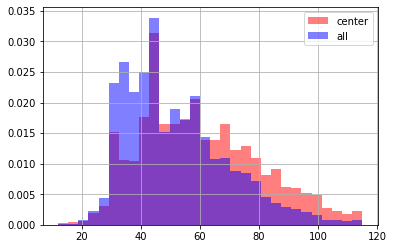

In [84]:
spb_center_sample['total_area'].hist(bins=30, label='center', alpha=0.5, color='red',density=True)
data_filtered['total_area'].hist(bins=30, label='all', alpha=0.5, color='blue', density=True)
plt.legend();

Наиболее частое значение общей площади в центре города ~43 квадратных метра. Эта гистограмма похожа на гистограмму выборки по всей базе, но значения немного сдвинулись в большую сторону

Цена

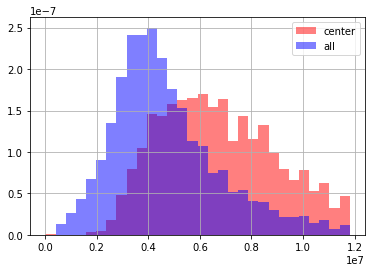

In [85]:
spb_center_sample['last_price'].hist(bins=30, label='center', alpha=0.5, color='red',density=True)
data_filtered['last_price'].hist(bins=30, label='all', alpha=0.5, color='blue', density=True)
plt.legend();

В центре города преобладают более дорогие квартиры, что логично

Количество комнат

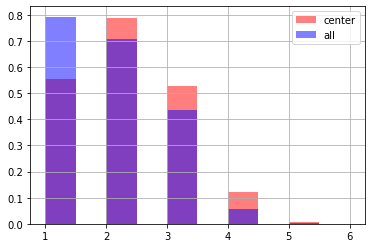

In [86]:
spb_center_sample['rooms'].hist(label='center', alpha=0.5, color='red',density=True)
data_filtered['rooms'].hist(label='all', alpha=0.5, color='blue', density=True)
plt.legend();

В центре больше продают двухкомнатные квартиры, чем однокомнатные

Высота потолков

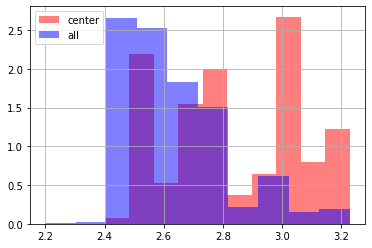

In [87]:
spb_center_sample['ceiling_height'].hist(label='center', alpha=0.5, color='red',density=True)
data_filtered['ceiling_height'].hist(label='all', alpha=0.5, color='blue', density=True)
plt.legend();

Зависимость цены от количества комнат

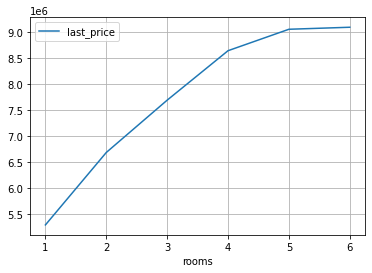

In [88]:
spb_center_sample.pivot_table(index='rooms', values='last_price').plot(grid=True);

Чем больше комнат, тем выше цена, как и в общей выборке

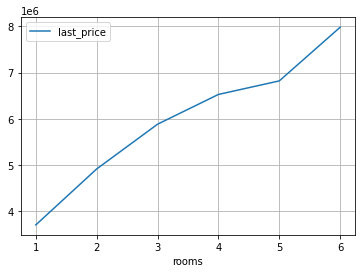

In [89]:
data_filtered.pivot_table(index='rooms', values='last_price').plot(grid=True);

Зависимость цены от этажа

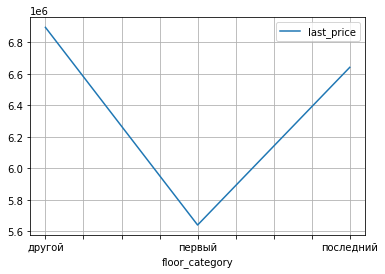

In [90]:
spb_center_sample.pivot_table(index='floor_category', values='last_price').plot(grid=True);

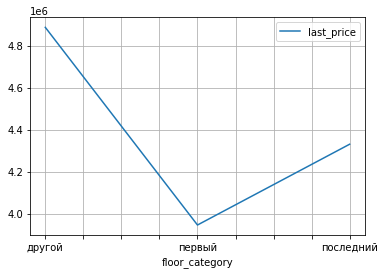

In [91]:
data_filtered.pivot_table(index='floor_category', values='last_price').plot(grid=True);

В среднем, цена на квартиры в центре выше и на первом этаже квартиры дешевле

Зависимость цены от расстояния до центра

In [92]:
spb_center_sample['to_center_km'].corr(spb_center_sample['last_price'])

-0.28284099198777135

In [93]:
data_filtered['cityCenters_nearest'].corr(data_filtered['last_price'])

-0.33245689166499454

В центре города зависимость цены от расстояния до центра выражена меньше, чем в общей выборке

Зависимость цены от дня, месяца и года публикации объявления

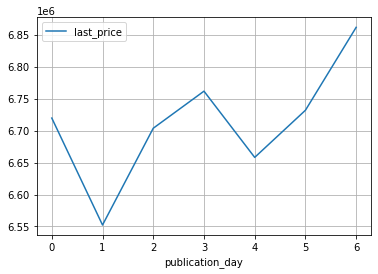

In [94]:
spb_center_sample.pivot_table(index='publication_day', values='last_price').plot(grid=True);

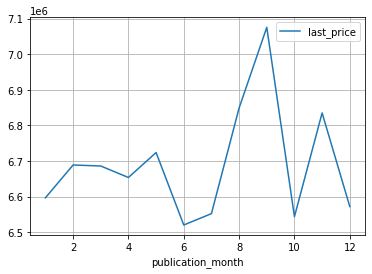

In [95]:
spb_center_sample.pivot_table(index='publication_month', values='last_price').plot(grid=True);

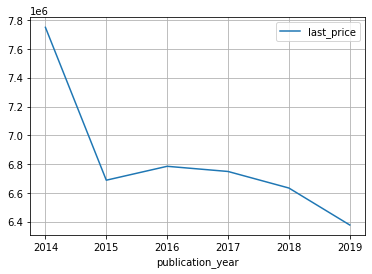

In [96]:
spb_center_sample.pivot_table(index='publication_year', values='last_price').plot(grid=True);

Данные зависимости отличаются от общей выборки. Пик в среду и повышение цены при приближении к выходным. На уровне месяца так же пик цены осенью, а в срезе по годам есть тенденция к снижению цены с каждым годом

## Шаг 5. Общий вывод

Мы провели исследование объявлений по продаже недвижимости в Санкт-Петербурге и соседних населенных пунктах. Выяснили, что больше всего в продаже однокомнатных квартир площадью около 40 квадратных метров и высотой потолка 2.6 метра. В центре города преобладают более просторные квартиры, с высокими потолками, большей площадью, количеством комнат 2 и более и, соответственно стоят они дороже. Так же узнали, что чаще всего квартиры продаются менее чем за 100 дней, на цену влияют такие факторы как площадь, расстояние до центра города и сам населенный пункт. Наиболее благоприятное время для продажи квартиры - середина недели весной и осенью. Самый низкий спрос на квартиры летом.